In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

400
0.47826195654891374


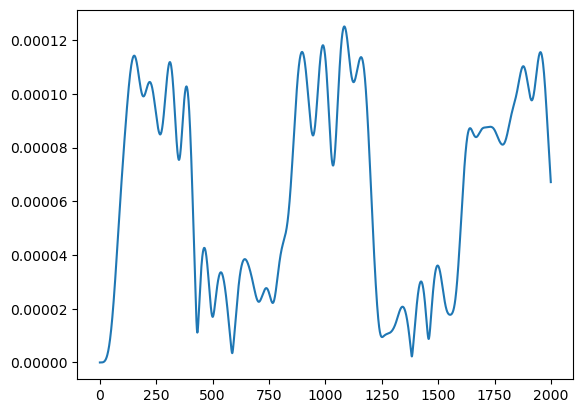

In [105]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

examplefile = "/home/jshenoy2/ProjectEspana/comm500bps/(0, 0)_b"
signal = read_complex_binary2(examplefile)
filtered_signal = butter_lowpass_filter(signal,6*500 ,400e3, order=5)
plt.plot(abs(filtered_signal[0:2000]))
print(calc_ber(filtered_signal,400e3,500))


In [94]:
import numpy as np
from scipy.signal import butter, filtfilt

signal = filtered_signal
fs = 400e3
f = 500
    # Rectify signal
signal = np.abs(signal)

# Calculate BER using sliding window
window_size = int(fs/f/2)
print(window_size)
min_ber = 1
power = []
for i in range(0, signal.size-window_size-0+1, window_size):
    power.append(np.linalg.norm(signal[i:i+window_size]))

num_bits = len(power)
if num_bits % 2 == 1:
    num_bits -= 1
    power = power[:-1]

threshold = np.mean(power)
power = np.reshape(power, (2, int(num_bits/2)))
error_bits = np.sum(power[0,:] < threshold) + np.sum(power[1,:] > threshold)
ber0 = error_bits / num_bits
if ber0 < min_ber:
    min_ber = ber0
print(ber0)


400
0.5


(0.0, 10.0)

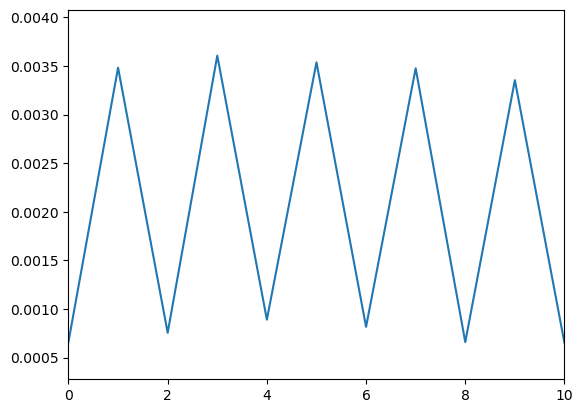

In [97]:
plt.plot(power[0])
plt.xlim([0,10])

In [104]:
import numpy as np
from scipy.signal import butter, filtfilt

def calc_ber(signal, fs, f):
    # Rectify signal
    signal = np.abs(signal)
    
    # Calculate BER using sliding window
    window_size = int(fs/f/2)
    print(window_size)
    min_ber = 1
    for offset in range(1, max(int(window_size/100), 1), window_size):
        symbol_count=0
        odd_bits=[]
        even_bits=[]
        for i in range(offset, signal.size-window_size-offset+1, window_size):
            power=(np.sum(signal[i:i+window_size]))
            if symbol_count%2==0:
                odd_bits.append(power)
            else:
                even_bits.append(power)
            symbol_count+=1
        
        threshold = (sum(even_bits)+sum(odd_bits))/(len(even_bits)+len(odd_bits))
        error_bits=0
        num_bits=len(odd_bits)+len(even_bits)
        if np.mean(odd_bits)<threshold:
            for i in odd_bits:
                if i>threshold:
                    error_bits+=1
            for i in even_bits:
                if i<threshold:
                    error_bits+=1
        else:
            for i in odd_bits:
                if i<threshold:
                    error_bits+=1
            for i in even_bits:
                if i>threshold:
                    error_bits+=1
        ber0 = error_bits / num_bits
        if ber0 < min_ber:
            min_ber = ber0
    
    return min_ber


['(10, 0)', 'b']
400
0.3703
['(70, 30)', 'a']
['(10, 40)', 'b']
400
0.32815
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
400
0.0077
['(60, 30)', 'b']
400
5e-05
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
400
0.03845
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
400
0.11235
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
400
0.1286
['(50, 60)', 'a']
['(50, 90)', 'b']
400
0.05365
['(70, 90)', 'b']
400
0.20335
['(0, 10)', 'b']
400
0.18535
['(0, 80)', 'b']
400
0.0928
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
400
0.00035
['(80, 80)', 'a']
['(60, 20)', 'b']
400
0.47805
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
400
0.03095
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
400
0.0709
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
400
0.17865
['(30, 50)', 'a']
['(40, 80)', 'b']
400
0.003
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
400


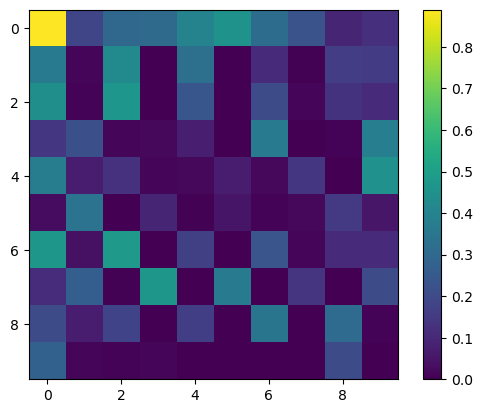

In [99]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm500bps/"
Ber_Mat  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*500 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,500)
        print(BER)
        Ber_Mat[x][y] = BER
plt.imshow(Ber_Mat)
plt.colorbar()
print("DONE Processing")

plt.imshow(Ber_Mat)
plt.colorbar()
print("DONE Processing")